In [1]:
#importing the necessary dependencies
#from caffe.proto import caffe_pb2
from layers import Fixations
from tf_helpers import Net, Data
#from urllib import urlretrieve
from utils import *
#import caffe
#import os

%matplotlib inline

In [2]:


#initializing the model

# Specifying to use the GPU
# caffe.set_mode_gpu()
# caffe.set_device(0)
# 
# model_path = os.path.join('../models', 'vgg_16', 'VGG_ILSVRC_16_layers.caffemodel')
# if not os.path.isfile(model_path):
#         print('Downloading VGG-16 weights...')
#         urlretrieve ("http://www.robots.ox.ac.uk/~vgg/software/very_deep/caffe/VGG_ILSVRC_16_layers.caffemodel", model_path)
# 
# net = caffe.Classifier('../models/vgg_16/deploy.prototxt', model_path, channel_swap=(2,1,0))

net = Net('../models/vgg_16/vgg16.ckpt.meta', '../models/vgg_16/vgg16.ckpt')

layers = Fixations(net)

In [3]:
def vgg(points, inc, resFac):
    points = layers.fc(points=points, layer='fc8', prevLayer='fc7')
    points = layers.fc(points=points, layer='fc7', prevLayer='fc6')
    points = layers.fc(points=points, layer='fc6', prevLayer='pool5')
    points = layers.pool(points=points, prevLayer='conv5_3', K=2, S=2)
    points = layers.conv(points=points,  layer='conv5_3', prevLayer='conv5_2', K=3, S=1, P=1)
    points = layers.conv(points=points,  layer='conv5_2', prevLayer='conv5_1', K=3, S=1, P=1)
    points = layers.conv(points=points,  layer='conv5_1', prevLayer='pool4', K=3, S=1, P=1)
    points = layers.pool(points=points, prevLayer='conv4_3', K=2, S=2)
    points = layers.conv(points=points,  layer='conv4_3', prevLayer='conv4_2', K=3, S=1, P=1)
    points = layers.conv(points=points,  layer='conv4_2', prevLayer='conv4_1', K=3, S=1, P=1)
    points = layers.conv(points=points,  layer='conv4_1', prevLayer='pool3', K=3, S=1, P=1)
    points = layers.pool(points=points, prevLayer='conv3_3', K=2, S=2)
    points = layers.conv(points=points,  layer='conv3_3', prevLayer='conv3_2', K=3, S=1, P=1)
    points = layers.conv(points=points,  layer='conv3_2', prevLayer='conv3_1', K=3, S=1, P=1)
    points = layers.conv(points=points,  layer='conv3_1', prevLayer='pool2', K=3, S=1, P=1)
    points = layers.pool(points=points, prevLayer='conv2_2', K=2, S=2)
    points = layers.conv(points=points,  layer='conv2_2', prevLayer='conv2_1', K=3, S=1, P=1)
    points = layers.conv(points=points,  layer='conv2_1', prevLayer='pool1', K=3, S=1, P=1)
    points = layers.pool(points=points, prevLayer='conv1_2', K=2, S=2)
    points = layers.data(points=points, inc=inc, resFac=resFac)
    return points

/usr/local/lib/python2.7/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


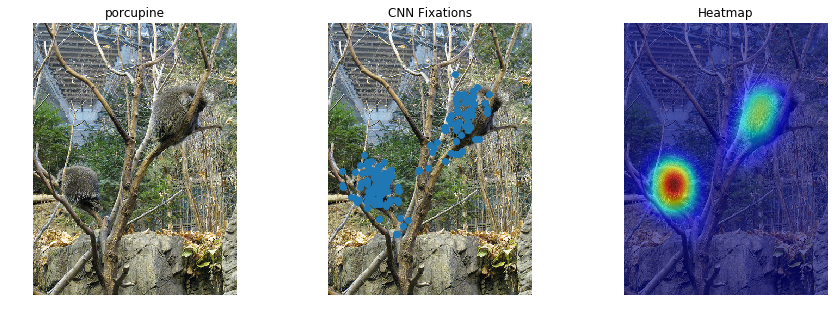

In [4]:
img_path = '../../data/ILSVRC_Validation/Images/ILSVRC2012_val_00000021.JPEG'
img, offset, resFac, newSize = imgPreprocess(img_path=img_path)
net.image_dims = newSize
points, image_label = pred(net, img)
points = vgg(points, offset, resFac)
visualize(img_path, points, diag_percent=0.1, image_label=image_label)